In [66]:
!pip install threddsclient
import threddsclient
import xarray as xr

In [3]:
all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'sulphate_total' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.19891101070000.20210420142507.filter_3pack.sulphate_total.aerosol.3y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc']

In [3]:
dsmf = xr.open_mfdataset(opendap_urls)
dsmf

<xarray.Dataset>
Dimensions:                                  (time: 1157, tbnds: 2,
                                              metadata_time: 4,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 1989-11-01...
  * metadata_time                            (metadata_time) datetime64[ns] 1...
Dimensions without coordinates: tbnds, sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags
Data variables:
    time_bnds                                (time, tbnds) datetime64[ns] dask.array<chunksize=(1157, 2), meta=np.ndarray>
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(4, 2), meta=np.ndarray>
    sulphate_total_ug_per_m3_ebasmetadata    (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3               (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_qc            (sulphate_total_ug_S_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_ebasmetadata  (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_per_m3                 (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
Attributes: (12/93)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of s...
    keywords:                          NO0042G, Zeppelin mountain (Ny-Ålesund...
    id:                                NO0042G.19891101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [6]:
dsmf.sulphate_total_ug_per_m3.compute()

<xarray.DataArray 'sulphate_total_ug_per_m3' (time: 1157)>
array([0.4, 0.8, 0.1, ..., 0.3, 0.1, 0.4])
Coordinates:
  * time     (time) datetime64[ns] 1989-11-01T19:00:00 ... 1992-12-31T19:00:00
Attributes:
    standard_name:                     mass_concentration_of_total_sulphateex...
    units:                             ug/m3
    ancillary_variables:               sulphate_total_ug_per_m3_qc sulphate_t...
    cell_methods:                      time: mean
    ebas_station_setting:              Polar
    ebas_unit:                         ug/m3
    ebas_station_longitude:            11.88668
    ebas_submitter:                    Hjellbrekke, Anne, agh@nilu.no, Norweg...
    ebas_station_gaw_type:             G
    ebas_framework_contact_name:       Wenche Aas, Wenche Aas, Kjetil Tørseth...
    ebas_framework_name:               , OSPARCOM - Comprehensive Atmospheric...
    ebas_volume_std_temperature:       ambient
    ebas_organization:                 NO01L, Norwegian Institute for Air Res...
    ebas_comment:                      Data converted on export from EBAS fro...
    ebas_standard_method:              SOP=EMEP_manual_v2014
    ebas_station_name:                 Zeppelin mountain (Ny-Ålesund)
    ebas_component:                    sulphate_total
    ebas_framework_acronym:            AMAP, CAMP, EMEP, EUSAAR, GAW-WDCA, NILU
    ebas_station_gaw_id:               ZEP
    ebas_statistics:                   arithmetic mean
    ebas_station_gaw_name:             Zeppelin Mountain (Ny Ålesund)
    ebas_laboratory_code:              NO01L
    ebas_framework_description:        , The OSPARCOM Comprehensive Atmospher...
    ebas_station_wmo_region:           6
    ebas_platform_code:                NO0042S
    ebas_inlet_type:                   Hat or hood
    ebas_station_wdca_id:              GAWANO__ZEP
    ebas_station_latitude:             78.90715
    ebas_station_code:                 NO0042G
    ebas_instrument_name:              f3p_d_0042
    ebas_medium:                       Teflon
    ebas_matrix:                       aerosol
    ebas_regime:                       IMG
    ebas_instrument_type:              filter_3pack
    ebas_data_level:                   2
    ebas_volume_std_pressure:          ambient
    ebas_revision_date:                20210420142507
    ebas_station_altitude:             474.0 m
    ebas_originator:                   Aas, Wenche, waa@nilu.no, Norwegian In...
    ebas_station_land_use:             Gravel and stone
    ebas_method_ref:                   NO01L_IC
    ebas_framework_contact_email:      waa@nilu.no, waa@nilu.no, kt@nilu.no, ...
    ebas_humidity_temperaure_control:  None

In [7]:
dsmf.compute()

<xarray.Dataset>
Dimensions:                                  (time: 1157, tbnds: 2,
                                              metadata_time: 4,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 1989-11-01...
  * metadata_time                            (metadata_time) datetime64[ns] 1...
Dimensions without coordinates: tbnds, sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags
Data variables:
    time_bnds                                (time, tbnds) datetime64[ns] 198...
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] ...
    sulphate_total_ug_per_m3_ebasmetadata    (metadata_time) |S64 b'{\n    "e...
    sulphate_total_ug_S_per_m3               (time) float64 0.15 0.28 ... 0.14
    sulphate_total_ug_S_per_m3_qc            (sulphate_total_ug_S_per_m3_qc_flags, time) float64 ...
    sulphate_total_ug_S_per_m3_ebasmetadata  (metadata_time) |S64 b'{\n    "e...
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, time) float64 ...
    sulphate_total_ug_per_m3                 (time) float64 0.4 0.8 ... 0.1 0.4
Attributes: (12/93)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of s...
    keywords:                          NO0042G, Zeppelin mountain (Ny-Ålesund...
    id:                                NO0042G.19891101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [8]:
dsmf.sulphate_total_ug_S_per_m3_qc.compute()

<xarray.DataArray 'sulphate_total_ug_S_per_m3_qc' (
                                                   sulphate_total_ug_S_per_m3_qc_flags: 1,
                                                   time: 1157)>
array([[ nan,  nan, 781., ...,  nan,  nan,  nan]])
Coordinates:
  * time     (time) datetime64[ns] 1989-11-01T19:00:00 ... 1992-12-31T19:00:00
Dimensions without coordinates: sulphate_total_ug_S_per_m3_qc_flags
Attributes:
    units:          1
    standard_name:  status_flag

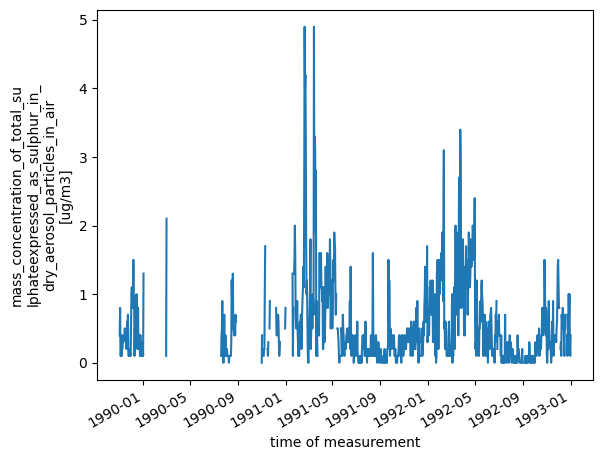

In [4]:
dsmf['sulphate_total_ug_per_m3'].plot()

In [11]:
dsmf

<xarray.Dataset>
Dimensions:                                  (time: 1157, tbnds: 2,
                                              metadata_time: 4,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 1989-11-01...
  * metadata_time                            (metadata_time) datetime64[ns] 1...
Dimensions without coordinates: tbnds, sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags
Data variables:
    time_bnds                                (time, tbnds) datetime64[ns] dask.array<chunksize=(1157, 2), meta=np.ndarray>
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(4, 2), meta=np.ndarray>
    sulphate_total_ug_per_m3_ebasmetadata    (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3               (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_qc            (sulphate_total_ug_S_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_ebasmetadata  (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_per_m3                 (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
Attributes: (12/93)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of s...
    keywords:                          NO0042G, Zeppelin mountain (Ny-Ålesund...
    id:                                NO0042G.19891101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [67]:
# Find url addresses for files on EBAS

all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'particle_number_size_distribution' in x]
opendap_urls = [x for x in opendap_urls if 'lev2' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.3y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20060101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.2y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20000301000000.20170523103005.dmps.particle_number_size_distribution.aerosol.6y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc']

In [68]:
# read multiple files
# the problem with this example is, that the files are from different instruments

dsmf08 = xr.open_mfdataset(opendap_urls[:1])
dsmf08

<xarray.Dataset>
Dimensions:                                         (time: 26280, tbnds: 2,
                                                     metadata_time: 3, D: 20,
                                                     particle_number_size_distribution_qc_flags: 2)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 10.0 ... 794.3
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(26280, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 3), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(20, 2, 26280), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(20, 26280), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20080101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

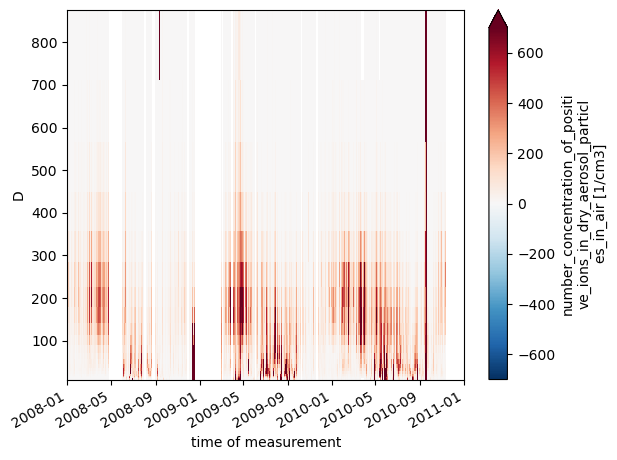

In [30]:
dsmf['particle_number_size_distribution'].plot(vmax=7e2)

In [59]:
dsmf = xr.open_mfdataset(opendap_urls[1:2])
dsmf

<xarray.Dataset>
Dimensions:                                                  (time: 8760,
                                                              tbnds: 2,
                                                              metadata_time: 1,
                                                              D: 20,
                                                              particle_number_size_distribution_perc8413_qc_flags: 2,
                                                              particle_number_size_distribution_prec1587_qc_flags: 2)
Coordinates:
  * time                                                     (time) datetime64[ns] ...
  * metadata_time                                            (metadata_time) datetime64[ns] ...
  * D                                                        (D) float64 10.0...
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_perc8413_qc_flags,
                                particle_number_size_distribution_prec1587_qc_flags
Data variables:
    time_bnds                                                (time, tbnds) datetime64[ns] dask.array<chunksize=(8760, 2), meta=np.ndarray>
    metadata_time_bnds                                       (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    particle_number_size_distribution_perc8413_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 1), meta=np.ndarray>
    particle_number_size_distribution_perc8413_qc            (D, particle_number_size_distribution_perc8413_qc_flags, time) float64 dask.array<chunksize=(20, 2, 8760), meta=np.ndarray>
    particle_number_size_distribution_prec1587_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 1), meta=np.ndarray>
    particle_number_size_distribution_prec1587_qc            (D, particle_number_size_distribution_prec1587_qc_flags, time) float64 dask.array<chunksize=(20, 2, 8760), meta=np.ndarray>
    particle_number_size_distribution_prec1587               (D, time) float64 dask.array<chunksize=(20, 8760), meta=np.ndarray>
    particle_number_size_distribution_perc8413               (D, time) float64 dask.array<chunksize=(20, 8760), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20080101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

In [77]:
ma = dsmf['particle_number_size_distribution_perc8413'].replace('D')<1e5

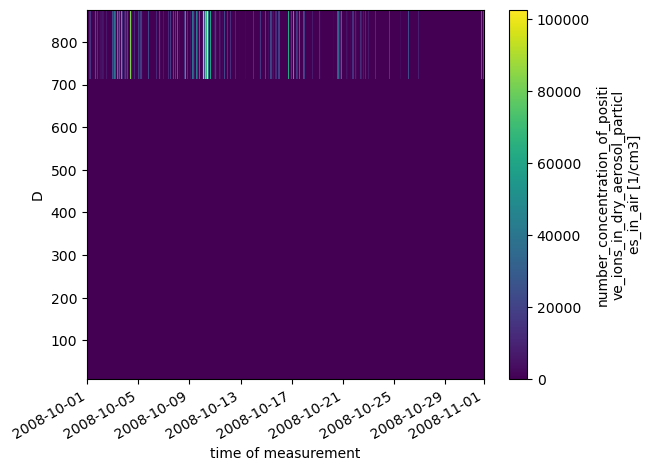

In [79]:
dsmf['particle_number_size_distribution_perc8413'].sel(time=slice('2008-10','2008-10')).plot()

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


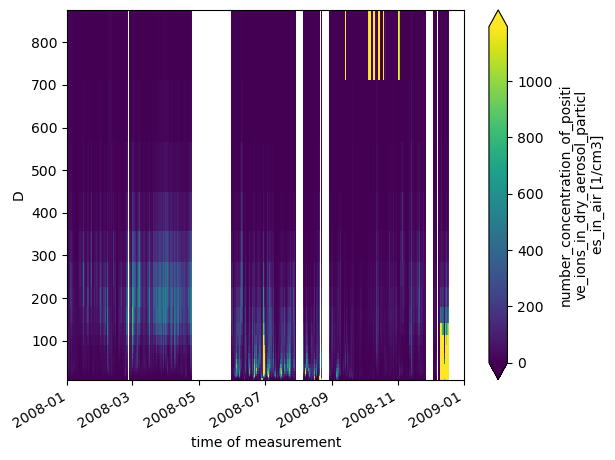

In [78]:
dsmf['particle_number_size_distribution_perc8413'].where(ma).plot(robust=True)

In [52]:
opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.3y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20060101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.2y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20000301000000.20170523103005.dmps.particle_number_size_distribution.aerosol.6y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc']

In [112]:
dsmf06 = xr.open_mfdataset(opendap_urls[2:3])
dsmf06

<xarray.Dataset>
Dimensions:                                         (time: 17520, tbnds: 2,
                                                     metadata_time: 2, D: 17,
                                                     particle_number_size_distribution_qc_flags: 1)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 15.67 ... 630.9
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(17520, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(2, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(17, 2), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(17, 1, 17520), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(17, 17520), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20060101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

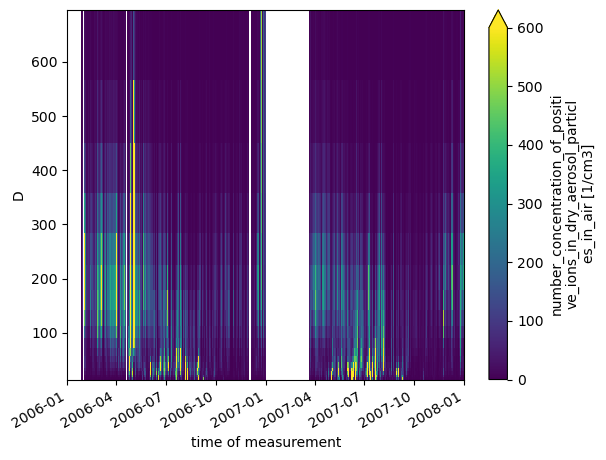

In [113]:
dsmf06['particle_number_size_distribution'].plot(vmax=6e2)

In [53]:
48960-17520

31440

In [56]:
dsmf00 = xr.open_mfdataset(opendap_urls[3:4])
dsmf00

<xarray.Dataset>
Dimensions:                                         (time: 48960, tbnds: 2,
                                                     metadata_time: 6, D: 16,
                                                     particle_number_size_distribution_qc_flags: 1)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 19.97 ... 630.9
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(48960, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(6, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(16, 6), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(16, 1, 48960), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(16, 48960), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20000301000000.20170523103005.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

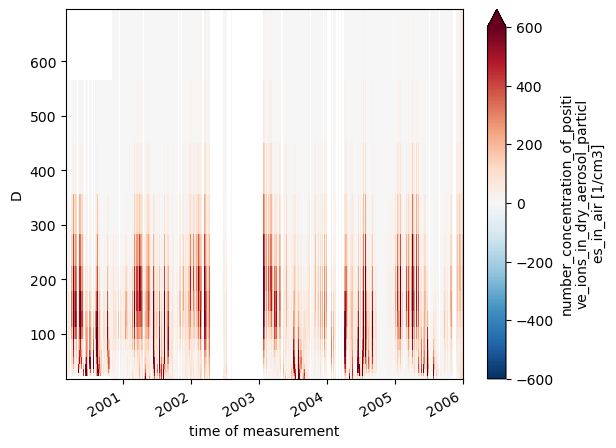

In [107]:
dsmf00['particle_number_size_distribution'].plot(vmax=6e2)

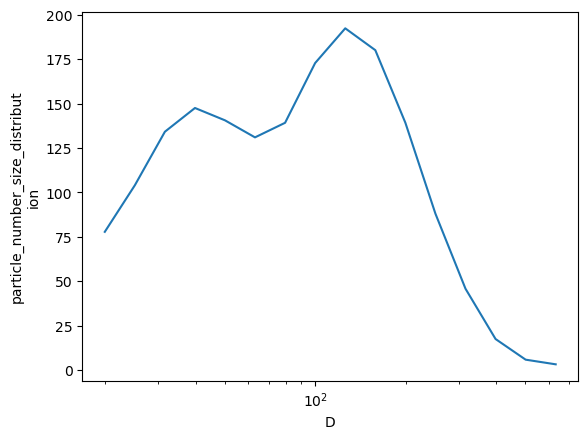

In [108]:
dsmf00['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")

<xarray.DataArray 'season' ()>
array('DJF', dtype='<U3')
Coordinates:
    season   <U3 'DJF'
<xarray.DataArray 'season' ()>
array('JJA', dtype='<U3')
Coordinates:
    season   <U3 'JJA'
<xarray.DataArray 'season' ()>
array('MAM', dtype='<U3')
Coordinates:
    season   <U3 'MAM'
<xarray.DataArray 'season' ()>
array('SON', dtype='<U3')
Coordinates:
    season   <U3 'SON'


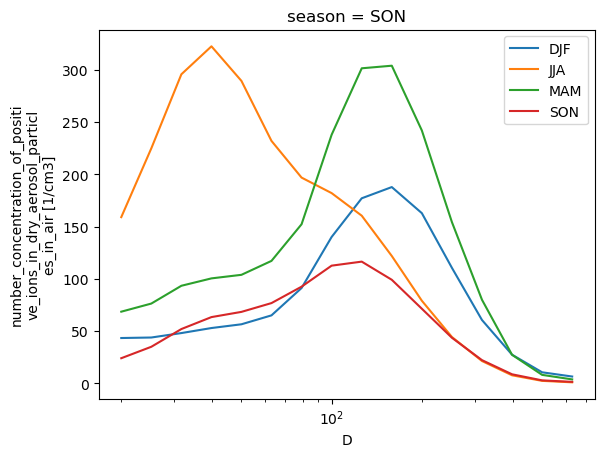

In [63]:
dsmf00_season = dsmf00.groupby('time.season').mean(keep_attrs=True)
for seas in dsmf00_season.season:
    print(seas)
    dsmf00_season.sel(season=seas)['particle_number_size_distribution'].plot(xscale = "log", label=seas.values)
#dsmf00_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()

In [58]:
dsmf00_season

<xarray.Dataset>
Dimensions:                                         (D: 16,
                                                     particle_number_size_distribution_qc_flags: 1,
                                                     season: 4,
                                                     metadata_time: 6, tbnds: 2)
Coordinates:
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 19.97 ... 630.9
  * season                                          (season) object 'DJF' ......
Dimensions without coordinates: particle_number_size_distribution_qc_flags,
                                tbnds
Data variables:
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, season) float64 dask.array<chunksize=(16, 1, 1), meta=np.ndarray>
    particle_number_size_distribution               (D, season) float64 dask.array<chunksize=(16, 1), meta=np.ndarray>
    metadata_time_bnds                              (season, metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(4, 6, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (season, D, metadata_time) |S64 dask.array<chunksize=(4, 16, 6), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20000301000000.20170523103005.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

In [114]:
dsmf06 = xr.open_mfdataset(opendap_urls[2:3])
dsmf06

<xarray.Dataset>
Dimensions:                                         (time: 17520, tbnds: 2,
                                                     metadata_time: 2, D: 17,
                                                     particle_number_size_distribution_qc_flags: 1)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 15.67 ... 630.9
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(17520, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(2, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(17, 2), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(17, 1, 17520), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(17, 17520), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20060101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

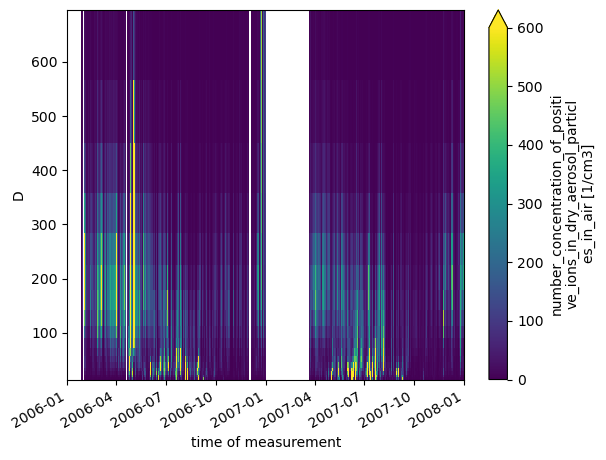

In [127]:
dsmf06['particle_number_size_distribution'].plot(vmax=6e2)

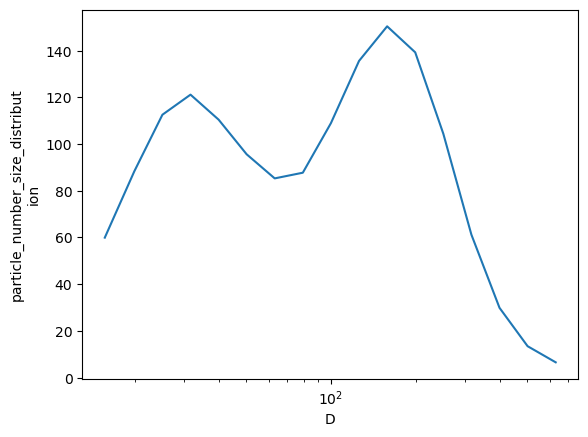

In [128]:
dsmf06['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")

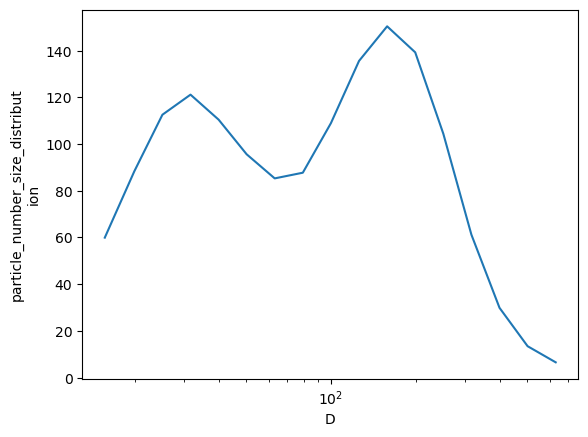

In [128]:
dsmf06['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")

In [6]:
dsmf08 = xr.open_mfdataset(opendap_urls[:1])
dsmf08

<xarray.Dataset>
Dimensions:                                         (time: 26280, tbnds: 2,
                                                     metadata_time: 3, D: 20,
                                                     particle_number_size_distribution_qc_flags: 2)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 10.0 ... 794.3
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(26280, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 3), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(20, 2, 26280), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(20, 26280), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20080101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

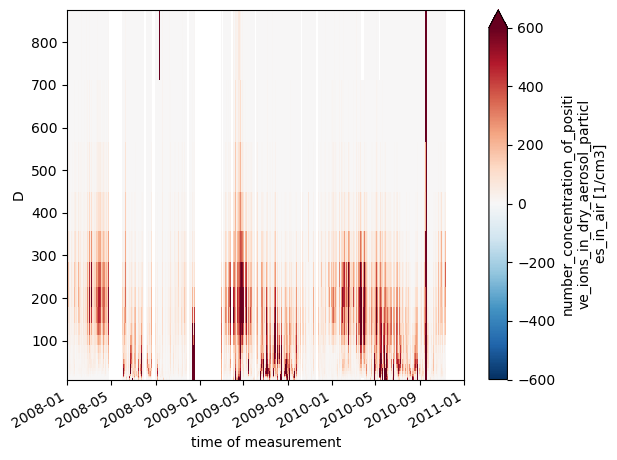

In [130]:
dsmf08['particle_number_size_distribution'].plot(vmax = 6e2)

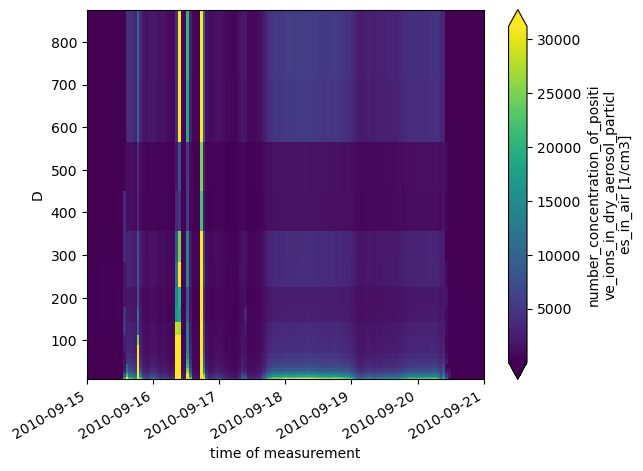

In [25]:
dsmf08['particle_number_size_distribution'].sel(time = slice('2010-09-15','2010-09-20')).plot(robust=True)

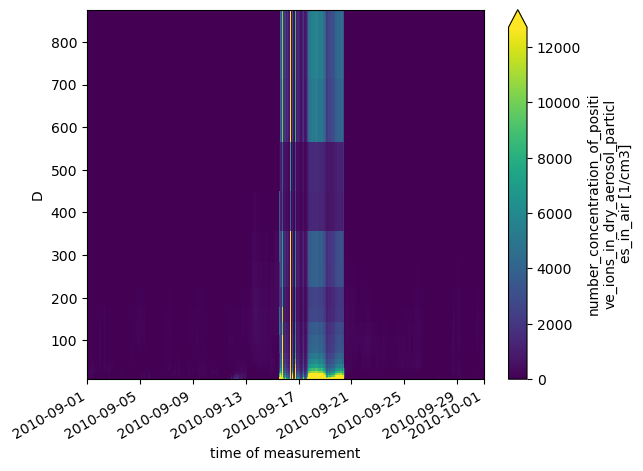

In [23]:
dsmf08['particle_number_size_distribution'].sel(time = slice('2010-09','2010-09')).plot(robust=True)

In [21]:
ma = dsmf08['particle_number_size_distribution'].max('D')<1e5

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


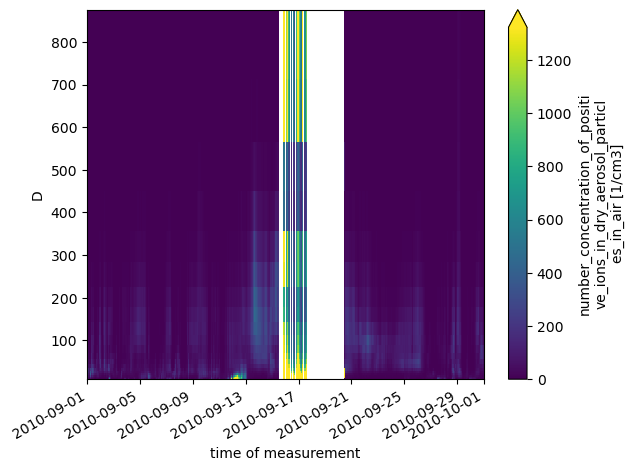

In [139]:
dsmf08['particle_number_size_distribution'].where(ma).sel(time = slice('2010-09','2010-09')).plot(robust=True)

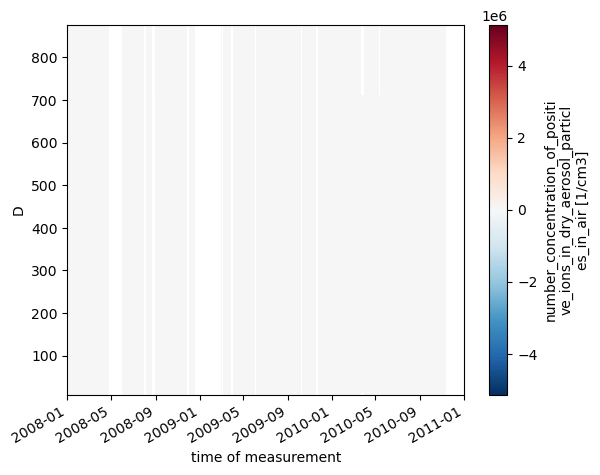

In [20]:
dsmf08['particle_number_size_distribution'].plot(robust=False)

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


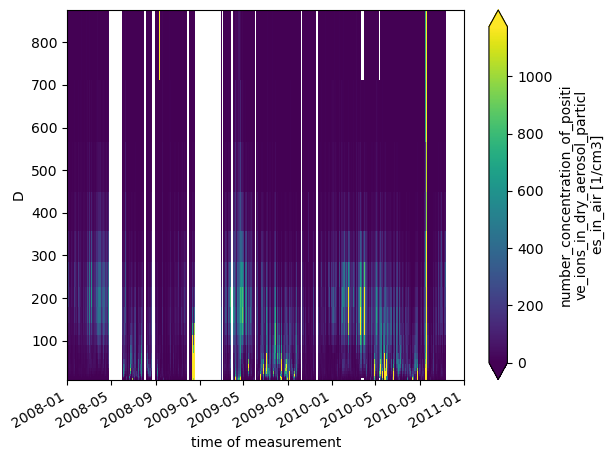

In [22]:
dsmf08['particle_number_size_distribution'].where(ma).plot(robust=True)

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


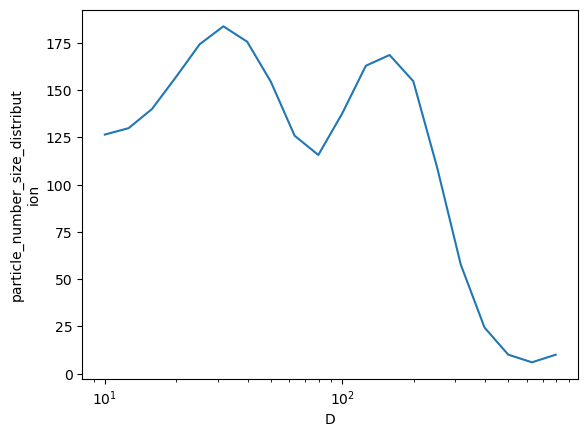

In [12]:
# New version: I was trying to get rid of the weird numbers at the top but got rid of lots of the data.
# <-----
dsmf08['particle_number_size_distribution'].where(ma).mean(dim = "time").plot(xscale = "log")

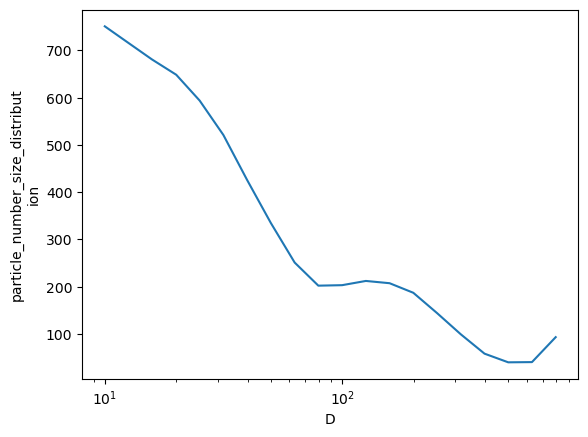

In [125]:
#This is what it looked like at first
# <------
dsmf08['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")

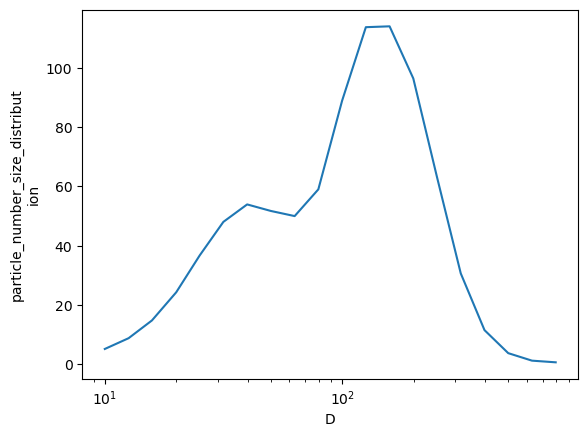

In [7]:
dsmf08['particle_number_size_distribution'].median(dim = "time").plot(xscale = "log")

In [17]:
ma = dsmf08['particle_number_size_distribution'].max('D')<1e4

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


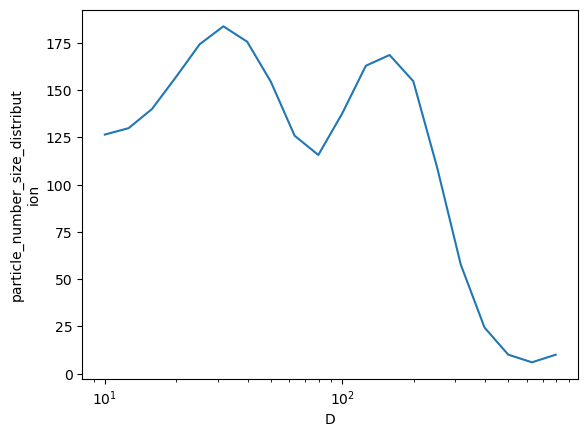

In [18]:
dsmf08['particle_number_size_distribution'].where(ma).mean(dim = "time").plot(xscale = "log")

The 2000 and 2006 data both go from 19.967974 until 630.9, except the 2006 data also has a data point at 15.672. The 2008 data on the other hand has data from 10. until 794.3

If we want to combine the data, can we integrate/extrapolate the 00 and 06 data to extend to match the 08 bounds?

## Experimenting with sulphate dataset

We know that the area under the curve should be the average number of particles present across the entire time series. The sulphate data is as a running concentration across the entire timeline. We need to do a numerical integration for each time step in order to calculate the number of particles present in total.

Under which size would we expect the sulphate particle to be? Would show up in both N50 and N100, sulphate particles are much larger

In [6]:
all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'sulphate_total' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.19891101070000.20210420142507.filter_3pack.sulphate_total.aerosol.3y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc']

In [7]:
sulf = xr.open_mfdataset(opendap_urls)
sulf.compute()

<xarray.Dataset>
Dimensions:                                  (time: 1157, tbnds: 2,
                                              metadata_time: 4,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 1989-11-01...
  * metadata_time                            (metadata_time) datetime64[ns] 1...
Dimensions without coordinates: tbnds, sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags
Data variables:
    time_bnds                                (time, tbnds) datetime64[ns] 198...
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] ...
    sulphate_total_ug_per_m3_ebasmetadata    (metadata_time) |S64 b'{\n    "e...
    sulphate_total_ug_S_per_m3               (time) float64 0.15 0.28 ... 0.14
    sulphate_total_ug_S_per_m3_qc            (sulphate_total_ug_S_per_m3_qc_flags, time) float64 ...
    sulphate_total_ug_S_per_m3_ebasmetadata  (metadata_time) |S64 b'{\n    "e...
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, time) float64 ...
    sulphate_total_ug_per_m3                 (time) float64 0.4 0.8 ... 0.1 0.4
Attributes: (12/93)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of s...
    keywords:                          NO0042G, Zeppelin mountain (Ny-Ålesund...
    id:                                NO0042G.19891101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [33]:
sulf['sulphate_total_ug_per_m3'&'sulphate_total_ug_S_per_m3'].plot()

TypeError: unsupported operand type(s) for &: 'str' and 'str'

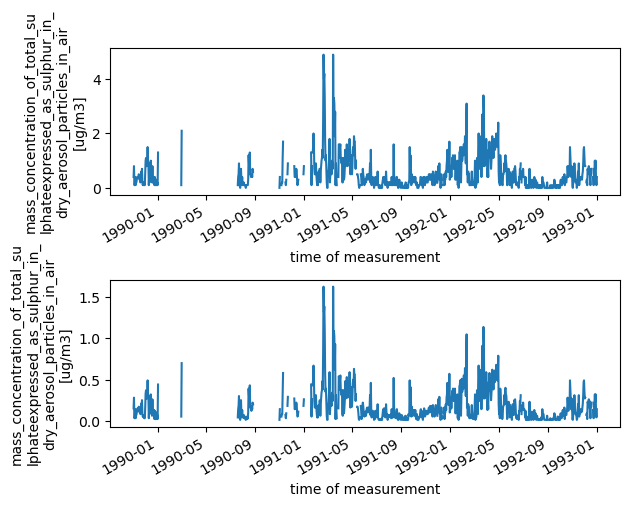

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2)
sulf['sulphate_total_ug_per_m3'].plot(ax=axes[0])


sulf['sulphate_total_ug_S_per_m3'].plot(ax=axes[1])

plt.tight_layout()

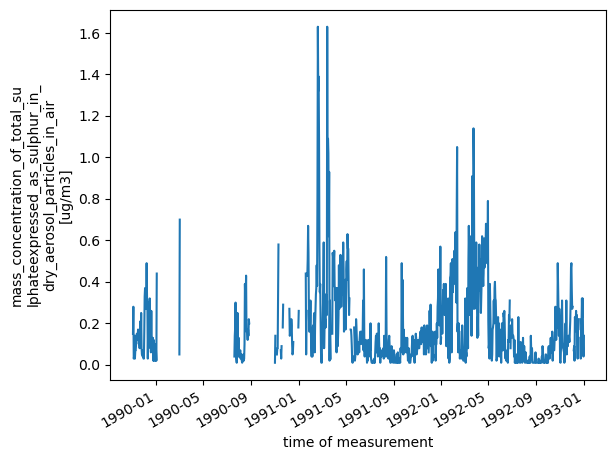

In [36]:
sulf['sulphate_total_ug_S_per_m3'].plot()

In [ ]:
plot

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


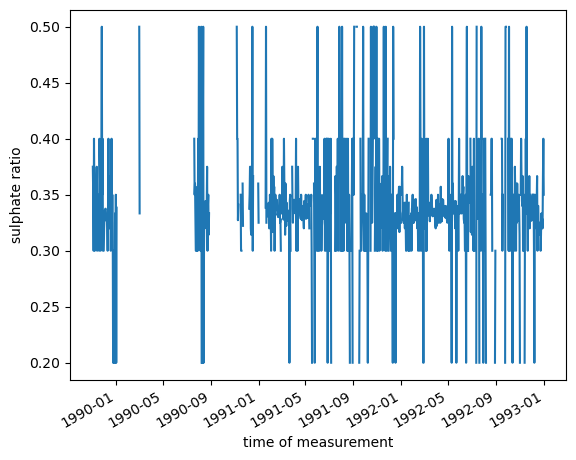

In [44]:
sulf['sulphate ratio'] = sulf['sulphate_total_ug_S_per_m3']/sulf['sulphate_total_ug_per_m3']
sulf['sulphate ratio'].plot()

In [46]:
(32.065*2)/((32.065*2)+(4*15.999))

0.50052292274792

In [47]:
(32.065)/((32.065)+(4*15.999))

0.3337983156535951

In [49]:
sulf_season = sulf.groupby('time.season').mean(keep_attrs=True)
sulf_season

<xarray.Dataset>
Dimensions:                                  (season: 4,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1,
                                              metadata_time: 4, tbnds: 2)
Coordinates:
  * metadata_time                            (metadata_time) datetime64[ns] 1...
  * season                                   (season) object 'DJF' ... 'SON'
Dimensions without coordinates: sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags, tbnds
Data variables:
    sulphate_total_ug_S_per_m3               (season) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_qc            (sulphate_total_ug_S_per_m3_qc_flags, season) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, season) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    sulphate_total_ug_per_m3                 (season) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    sulphate ratio                           (season) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    metadata_time_bnds                       (season, metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(4, 4, 2), meta=np.ndarray>
    sulphate_total_ug_per_m3_ebasmetadata    (season, metadata_time) |S64 dask.array<chunksize=(4, 4), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_ebasmetadata  (season, metadata_time) |S64 dask.array<chunksize=(4, 4), meta=np.ndarray>
Attributes: (12/93)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of s...
    keywords:                          NO0042G, Zeppelin mountain (Ny-Ålesund...
    id:                                NO0042G.19891101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [51]:
sulf_season['sulphate_total_ug_per_m3'].plot(col='season')

ValueError: Only 1d and 2d plots are supported for facets in xarray. See the package `Seaborn` for more options.

## Calculating N50/ N100

In [1]:
import numpy as np
import xarray as xr

def compute_Nx_ebas_cleaned(ds, x=100, var_diam = 'D',v_dNdlog10D='particle_number_size_distribution'):

    v_log10D = 'log10D'
    ds[v_log10D] = np.log10(ds[var_diam])
    mid_points = (ds[v_log10D].values[0:-1] + ds[v_log10D].values[1:]) / 2
    bottom = ds[v_log10D].values[0] - (mid_points[0] - ds[v_log10D].values[0])
    top = ds[v_log10D].values[-1] + (mid_points[-1] - ds[v_log10D].values[-2])

    d_lims = np.concatenate([np.array([bottom]), mid_points, np.array([top])])
    # Somehow I thought it was a good idea to go to linear space and back to log later.....
    d_lims = 10**d_lims

    ds['bottom'] = xr.DataArray(d_lims[0:-1].transpose(), dims={var_diam: ds[var_diam]})
    ds['top'] = xr.DataArray(d_lims[1:].transpose(), dims={var_diam: ds[var_diam]})

    ds['diam_lims'] = ds[['bottom', 'top']].to_array(dim='limit')
    # compute dlogD:
    dlog10D = (np.log10(ds['diam_lims'].sel(limit='top')) - np.log10(ds['diam_lims'].sel(limit='bottom')))

    ds['dlog10D'] = xr.DataArray(dlog10D, dims={var_diam: ds[var_diam]})

    ds['log10D'] = np.log10(ds[var_diam])
    # compute number of particles in each bin:
    ds['dN'] = ds[v_dNdlog10D] * ds['dlog10D']

    arg_gt_x = int(ds[var_diam].where(ds['diam_lims'].sel(limit='bottom') > x).argmin().values)
    # get limits for grid box below
    # In log space...
    d_below = np.log10(ds['diam_lims'].isel(D=(arg_gt_x - 1)).sel(limit='bottom'))
    d_above = np.log10(ds['diam_lims'].isel(D=(arg_gt_x - 1)).sel(limit='top'))
    # fraction of gridbox above limit:
    frac_ab = (d_above - np.log10(x)) / (d_above - d_below)
    # Include the fraction of the bin box above limit:
    add = ds['dN'].isel(D=(arg_gt_x - 1)) * frac_ab

    Nx_orig = ds['dN'].isel(D=slice(arg_gt_x,None)).sum('D') + add
    return Nx_orig

In [5]:
all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'particle_number_size_distribution' in x]
opendap_urls = [x for x in opendap_urls if 'lev2' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.3y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20060101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.2y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20000301000000.20170523103005.dmps.particle_number_size_distribution.aerosol.6y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc']

In [19]:
dsmf08 = xr.open_mfdataset(opendap_urls[:1])
dsmf08.compute()

<xarray.Dataset>
Dimensions:                                         (time: 26280, tbnds: 2,
                                                     metadata_time: 3, D: 20,
                                                     particle_number_size_distribution_qc_flags: 2)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 10.0 ... 794.3
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] ...
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 b...
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 ...
    particle_number_size_distribution               (D, time) float64 1.51 .....
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20080101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

In [22]:
compute_Nx_ebas_cleaned(dsmf08, x=50, var_diam = 'D',v_dNdlog10D='particle_number_size_distribution').compute()

<xarray.DataArray (time: 26280)>
array([31.16426184, 27.85821607, 12.11356536, ...,         nan,
               nan,         nan])
Coordinates:
  * time     (time) datetime64[ns] 2008-01-01T00:30:00 ... 2010-12-31T23:30:00
    D        float64 50.1
    limit    <U3 'top'

In [50]:
N50_2008 = compute_Nx_ebas_cleaned(dsmf08, x=50)
N50_2008.compute()

<xarray.DataArray (time: 26280)>
array([31.16426184, 27.85821607, 12.11356536, ...,         nan,
               nan,         nan])
Coordinates:
  * time     (time) datetime64[ns] 2008-01-01T00:30:00 ... 2010-12-31T23:30:00
    D        float64 50.1
    limit    <U3 'top'

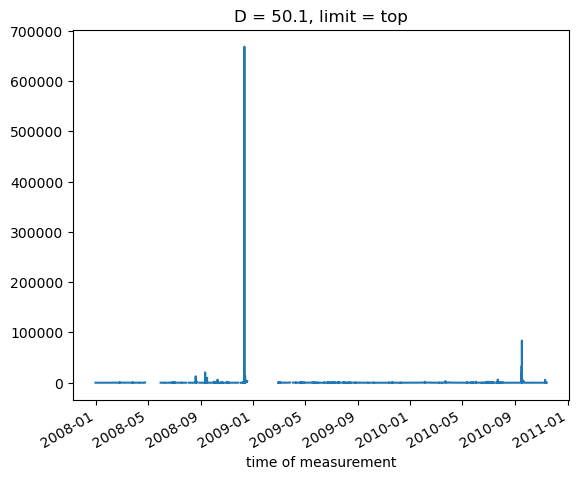

In [51]:
N50_2008.plot()

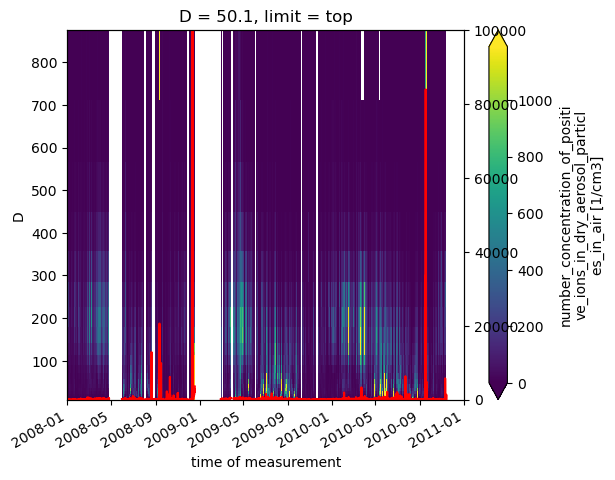

In [52]:
import matplotlib.pyplot as plt

f, ax =plt.subplots()
dsmf08['particle_number_size_distribution'].plot(robust=True, ax=ax)

N50_2008.plot( ax = ax.twinx(), c='r', ylim=[0,100000])

In [32]:
dsmf00 = xr.open_mfdataset(opendap_urls[3:4])
dsmf00.compute()

<xarray.Dataset>
Dimensions:                                         (time: 48960, tbnds: 2,
                                                     metadata_time: 6, D: 16,
                                                     particle_number_size_distribution_qc_flags: 1)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 19.97 ... 630.9
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] ...
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 b...
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 ...
    particle_number_size_distribution               (D, time) float64 nan ......
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20000301000000.20170523103005.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

In [53]:
N50_2000 = compute_Nx_ebas_cleaned(dsmf00, x=50)
N50_2000.compute()

<xarray.DataArray (time: 48960)>
array([         nan,          nan,          nan, ..., 128.60199607,
       133.35586638, 142.79444285])
Coordinates:
  * time     (time) datetime64[ns] 2000-03-01T00:30:00 ... 2005-12-31T23:30:00
    D        float64 50.12
    limit    <U3 'top'

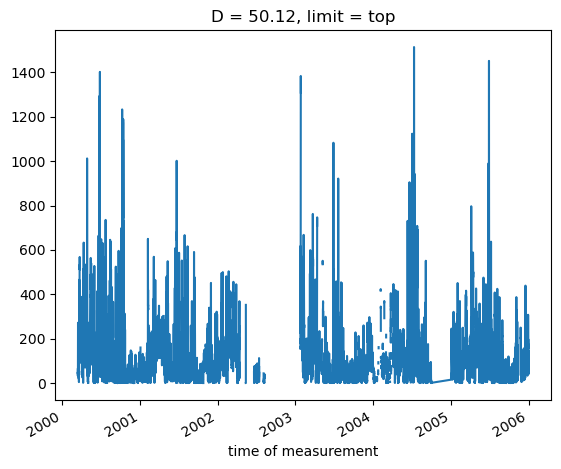

In [54]:
N50_2000.plot()

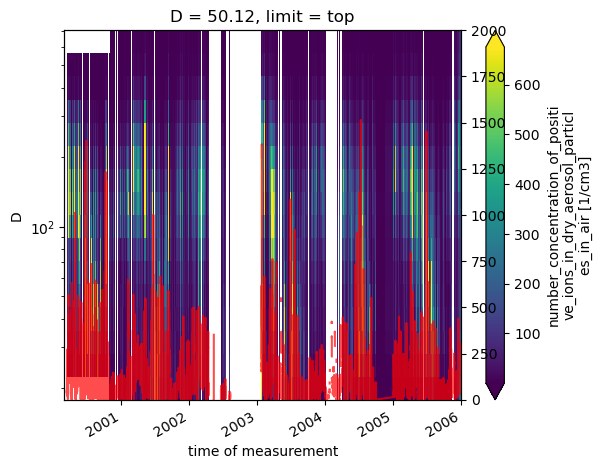

In [56]:
f, ax =plt.subplots()
dsmf00['particle_number_size_distribution'].plot(robust=True, ax=ax, yscale = 'log' )

N50_2000.plot( ax = ax.twinx(), c='r', ylim=[0,2000], alpha = 0.7)

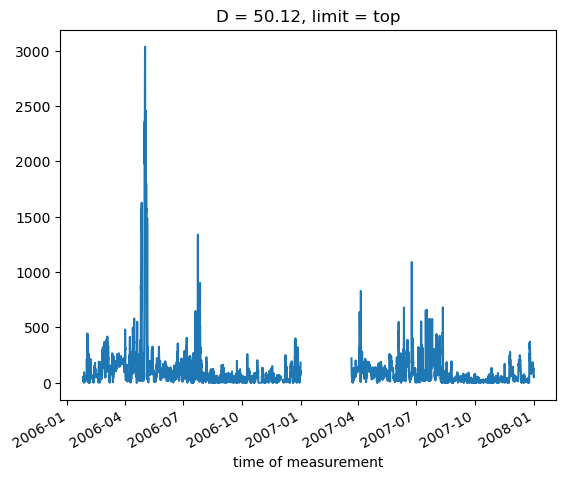

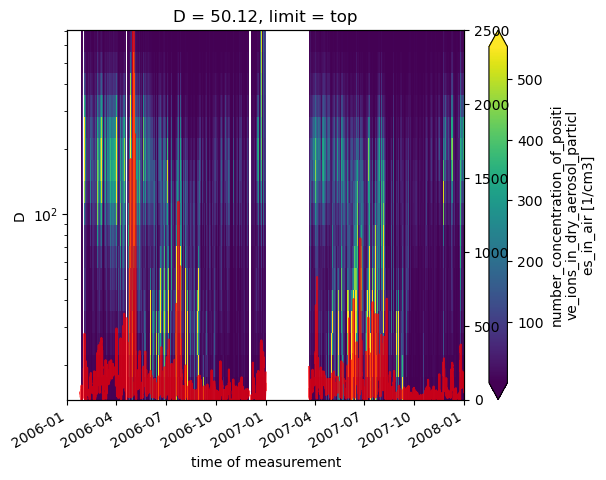

In [57]:
dsmf06 = xr.open_mfdataset(opendap_urls[2:3])

N50_2006 = compute_Nx_ebas_cleaned(dsmf06, x=50)

N50_2006.plot()

f, ax =plt.subplots()
dsmf06['particle_number_size_distribution'].plot(robust=True, ax=ax, yscale = 'log' )

N50_2006.plot( ax = ax.twinx(), c='r', ylim=[0,2500], alpha = 0.7)

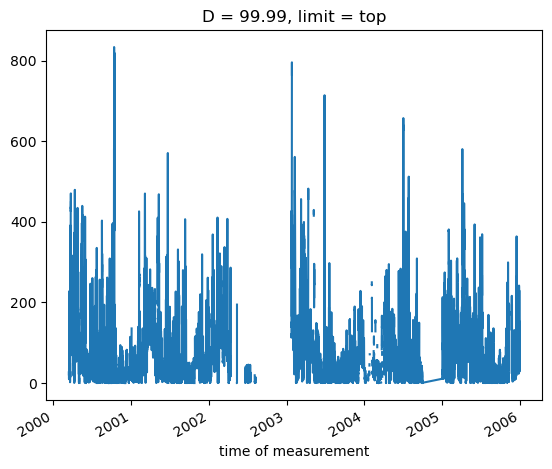

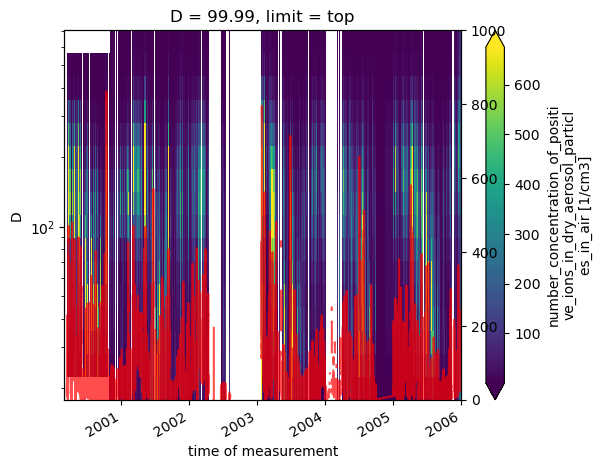

In [46]:
dsmf00 = xr.open_mfdataset(opendap_urls[3:4])

N100_2000 = compute_Nx_ebas_cleaned(dsmf00)

N100_2000.plot()

f, ax =plt.subplots()
dsmf00['particle_number_size_distribution'].plot(robust=True, ax=ax, yscale = 'log' )

N100_2000.plot( ax = ax.twinx(), c='r', ylim=[0,1000], alpha = 0.7)

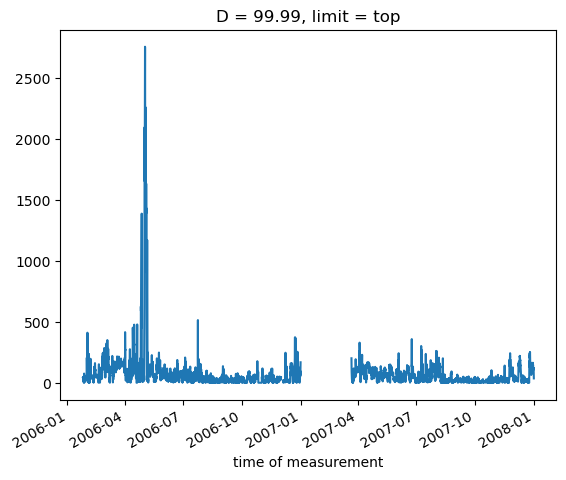

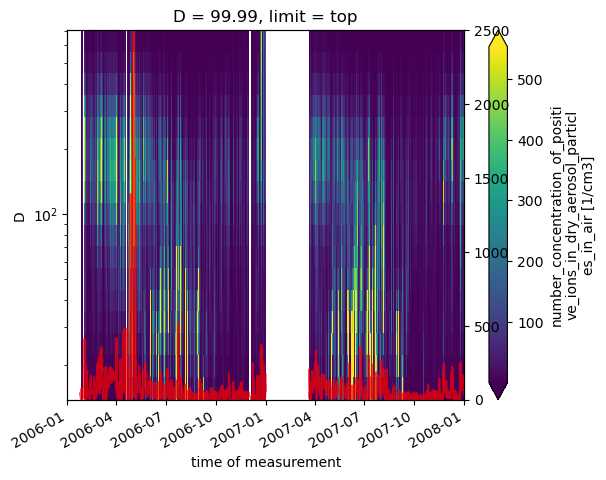

In [47]:
dsmf06 = xr.open_mfdataset(opendap_urls[2:3])

N100_2006 = compute_Nx_ebas_cleaned(dsmf06)

N100_2006.plot()

f, ax =plt.subplots()
dsmf06['particle_number_size_distribution'].plot(robust=True, ax=ax, yscale = 'log' )

N100_2006.plot( ax = ax.twinx(), c='r', ylim=[0,2500], alpha = 0.7)

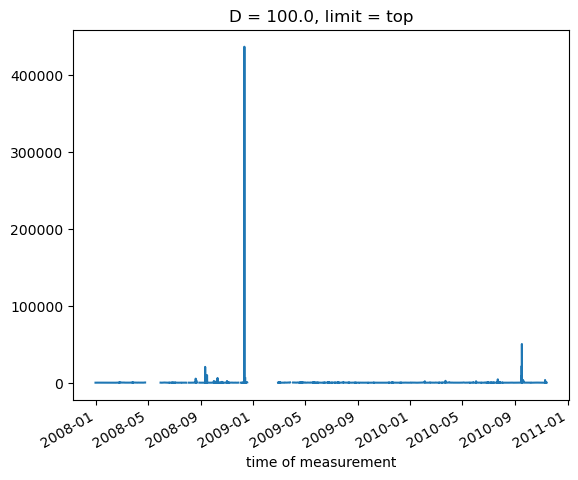

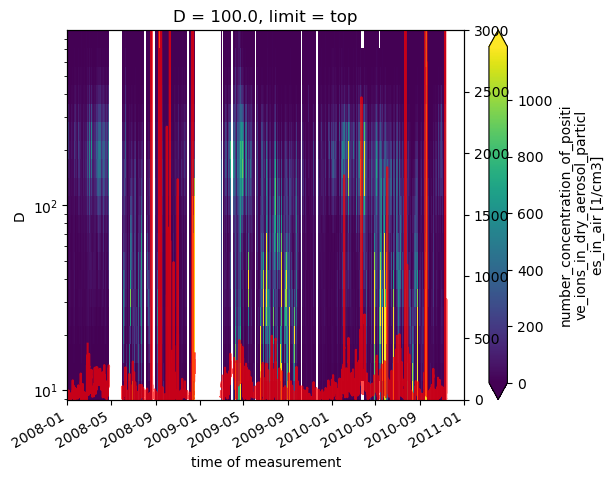

In [62]:
N100_2008 = compute_Nx_ebas_cleaned(dsmf08)

N100_2008.plot()

f, ax =plt.subplots()
dsmf08['particle_number_size_distribution'].plot(robust=True, ax=ax, yscale = 'log' )

N100_2008.plot( ax = ax.twinx(), c='r', ylim=[0,3000], alpha = 0.7)

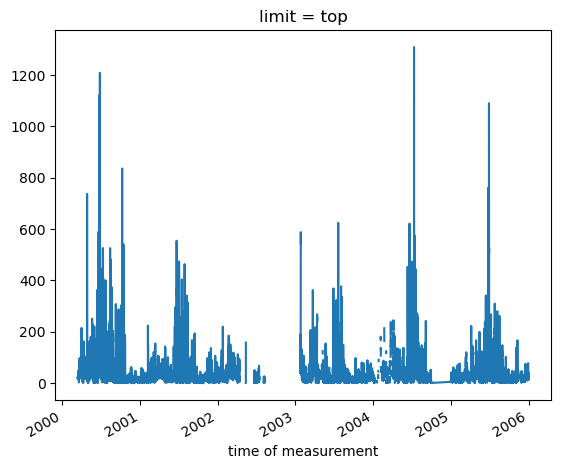

In [58]:
N50_100_2000 = N50_2000 - N100_2000
N50_100_2000.plot()

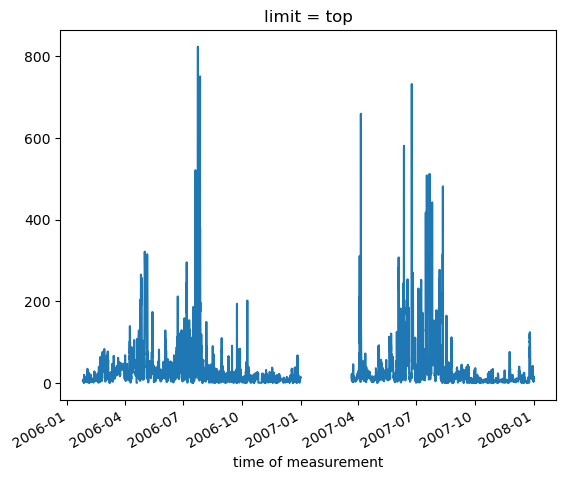

In [59]:
N50_100_2006 = N50_2006 - N100_2006
N50_100_2006.plot()

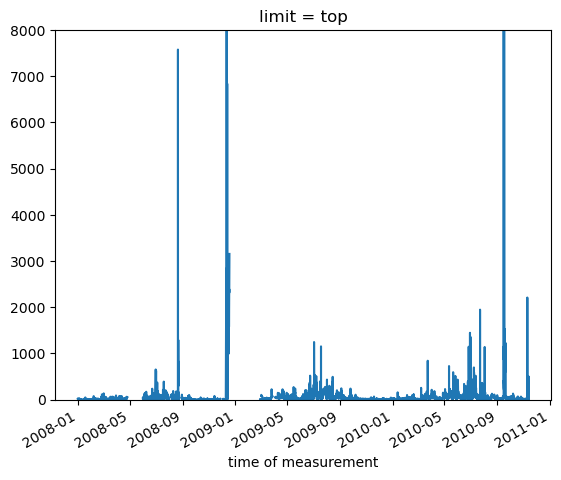

In [65]:
N50_100_2008 = N50_2008 - N100_2008
N50_100_2008.plot(ylim = [0,8000])